In [28]:
# This is a utility function (you do not need to understand it) 
# which overrides Ijulia's image widget so that manipulate displays with the proper width
immutable ImgFrame
    img::Image
end
Base.writemime(io::IO, m::MIME"text/html", frame::ImgFrame) = 
write(io, """<img src="data:image/png;base64,$(stringmime(MIME("image/png"), frame.img))"/>""")

writemime (generic function with 38 methods)

In [14]:
using Images
using Interact

In [8]:
import ImageSeamReference
reload("ImageSeamReference")

In [59]:
import ImageSeam
reload("ImageSeam")

In [60]:
# Wikipedia demo
if ~isfile("320px-Broadway_tower_edit.jpg")
    run(`wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Broadway_tower_edit.jpg/320px-Broadway_tower_edit.jpg`)
end
img = imread("320px-Broadway_tower_edit.jpg")

A = ImageSeam.all_carvings(img)
ImageSeam.verify(A)


When we reach 319 we have carved the image down to 1 pixel wide:
5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285 290 295 300 305 310 315 319 1    array.jl; size; line: 48


true

1    multidimensional.jl; _unsafe_batchsetindex!; line: 335
1    multidimensional.jl; _unsafe_getindex; line: 193
4337 task.jl; anonymous; line: 447
 4333 .../IJulia/src/IJulia.jl; eventloop; line: 141
  4333 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 177
   4333 loading.jl; include_string; line: 266
    4325 ...eam/src/ImageSeam.jl; all_carvings; line: 109
     1    ...eam/src/ImageSeam.jl; carve; line: 85
     12   ...eam/src/ImageSeam.jl; carve; line: 86
      4 ...a/Images/src/core.jl; kwargs2dict; line: 1076
       3 ...a/lib/julia/sys.dylib; zeros; (unknown line)
     1    ...eam/src/ImageSeam.jl; carve; line: 89
     102  ...eam/src/ImageSeam.jl; carve; line: 90
      8  .../lib/julia/sys.dylib; vcat; (unknown line)
      62 ...a/Images/src/core.jl; getindex; line: 333
       16 multidimensional.jl; _unsafe_getindex; line: 193
       29 multidimensional.jl; _unsafe_getindex; line: 195
      2  cartesian.jl; _unsafe_batchsetindex!; line: 34
      5  multidimensio

In [39]:
typeof(A[1])

Images.Image{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2,Array{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2}}

Interact.Slider{Int64}([Reactive.Input{Int64}] 320,"",320,2:320)

ImgFrame(RGB4 Images.Image with:
  data: 320x217 Array{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2}
  properties:
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1)
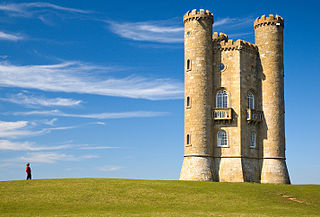

In [15]:
@manipulate for image_width=slider(2:size(img,1), value=size(img,1))
    ImgFrame(A[1+size(img,1)-image_width])
end